# Fourth Order Cumulant Expansion Method:

#### Obtaining the analytic equations of motion (and print all the variables in the equations of motion):

In [2]:
using QuantumCumulants

# Building the Hilbert space:
(hil_a,hil_b,hil_c) = (FockSpace(:pump),FockSpace(:signal), FockSpace(:idler))
hilbert_space = hil_a ⊗ hil_b ⊗ hil_c

# Defining the operators with labels "a", "b" and "c" in pump, signal and idler subspaces respectively:
(oper_a,oper_b,oper_c)= (Destroy(hilbert_space,:a,1), Destroy(hilbert_space,:b,2), 
                               Destroy(hilbert_space,:c,3))

# Hamiltonian:
hami =im*oper_a*oper_b'*oper_c'-im*oper_a'*oper_b*oper_c # Hamiltonian

# Finds all the fourth-order operators:
relev_operators=find_operators(hilbert_space,4)

# Finds all the equations using the fourth order cumulant expansion:
eqns_motion_analy = meanfield(relev_operators, hami; order=4)

# Printing the variables associated with the equations of motion:
ll=range(1,length(eqns_motion_analy),step=1)
#creating a table:
temp_table = fill("", 110)
for ii in ll
       temp_table[ii]="$ii: $(eqns_motion_analy[ii].lhs)"
       end
x=reshape(temp_table,(22,5))
Base.print_matrix(stdout, x)

 "1: ⟨a⟩"        "23: ⟨a*b′*c⟩"    "45: ⟨a*b′*b*c⟩"   "67: ⟨a′*a′*a*c⟩"   "89: ⟨a′*a′*a*a⟩"
 "2: ⟨b⟩"        "24: ⟨a*c′*c⟩"    "46: ⟨a*b*c′*c⟩"   "68: ⟨a*b′*c′*c⟩"   "90: ⟨a*a*a*a⟩"
 "3: ⟨c⟩"        "25: ⟨a*a*c⟩"     "47: ⟨a*a*b*c⟩"    "69: ⟨a*a*b′*c⟩"    "91: ⟨b′*b*c′*c⟩"
 "4: ⟨a*b⟩"      "26: ⟨a*c*c⟩"     "48: ⟨a*b*b*c⟩"    "70: ⟨a*b′*c*c⟩"    "92: ⟨b′*b*c*c⟩"
 "5: ⟨a*c⟩"      "27: ⟨a′*a′*a⟩"   "49: ⟨a*b*c*c⟩"    "71: ⟨a*b′*b′*c⟩"   "93: ⟨b′*b′*b*c⟩"
 "6: ⟨a′*a⟩"     "28: ⟨a*b′*c′⟩"   "50: ⟨a′*a*b′*b⟩"  "72: ⟨a*a*c′*c⟩"    "94: ⟨b*b*c′*c⟩"
 "7: ⟨a*b′⟩"     "29: ⟨a*a*b′⟩"    "51: ⟨a′*a*b*c′⟩"  "73: ⟨a*c′*c′*c⟩"   "95: ⟨b*c′*c′*c⟩"
 "8: ⟨a*c′⟩"     "30: ⟨a*b′*b′⟩"   "52: ⟨a′*a*b*b⟩"   "74: ⟨a*a*c*c⟩"     "96: ⟨b*b*c*c⟩"
 "9: ⟨a*a⟩"      "31: ⟨a*a*c′⟩"    "53: ⟨a′*a′*a*b⟩"  "75: ⟨a′*a*a*c⟩"    "97: ⟨b′*b*b*c⟩"
 "10: ⟨b*c⟩"     "32: ⟨a*c′*c′⟩"   "54: ⟨a*b′*b*c′⟩"  "76: ⟨a*a*a*c⟩"     "98: ⟨b*b*b*c⟩"
 "11: ⟨b′*b⟩"    "33: ⟨a*a*a⟩"     "55: ⟨a*a*b′*b⟩"   "77: ⟨a*c′*c*c⟩"    "99: ⟨b*c′*c*c⟩

#### Setting up parameters and solving the ODE:

In [3]:
using ModelingToolkit
using OrdinaryDiffEq

ALP_SQ = 100  # alpha square
ALP=sqrt(ALP_SQ) ## alpha

# Setting up the time array for evolution:
T_END = 0.380 # Total time of the evolution
DELT_T = 0.001 # Time step for the evolution
t_arr = LinRange(0, T_END,round(Int, T_END / DELT_T) + 1);
################################################################################
# Equations of motion become unstable at longer times, so noting those times
# when they become unstable:
#DELT_T=0.001 and T_END=0.380 for ALP_SQ=sqrt(100)
#DELT_T=0.001 and T_END=0.332 for ALP_SQ=sqrt(163) 
#DELT_T=0.001 and T_END=0.270 for ALP_SQ=sqrt(268)
#DELT_T=0.001 and T_END=0.220 for ALP_SQ=sqrt(439) 
#DELT_T=0.001 and T_END=0.178 for ALP_SQ=sqrt(719) 
#DELT_T=0.0005 and T_END=0.156 for ALP_SQ=sqrt(1000) 
################################################################################

# Initial conditions for the ODE:
sol_ini = zeros(ComplexF64,109)
sol_ini[1]=ALP
sol_ini[6]=ALP_SQ
sol_ini[9]=ALP_SQ
sol_ini[27]=ALP^3
sol_ini[33]=ALP^3
sol_ini[79]=ALP^4
sol_ini[89]=ALP^4
sol_ini[90]=ALP^4

# Solving the ODEs:
@named system_eqns = ODESystem(eqns_motion_analy)
problem = ODEProblem(system_eqns,sol_ini,(0.0,last(t_arr)));
sol = solve(problem,Tsit5(),abstol=1e-16,reltol=1e-16, saveat = t_arr);

#### 1. Plotting the populations:

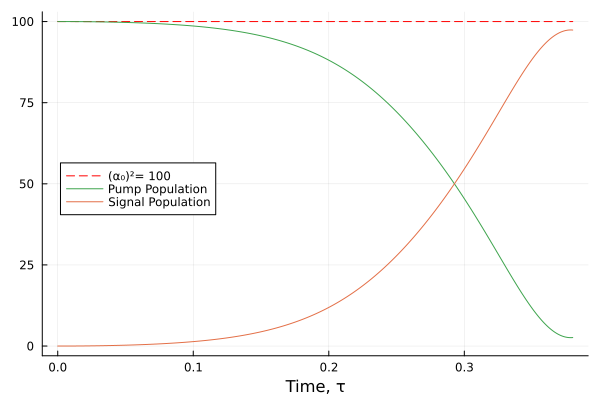

In [4]:
using Plots
plot([0, last(t_arr)], [ALP_SQ, ALP_SQ],ls=:dash,color=:red,label="(α₀)²= $ALP_SQ")
plot!(sol.t,real.(sol[oper_a'*oper_a]),label="Pump Population",color=3)
plot!(sol.t,real.(sol[oper_b'*oper_b]),xlabel="Time, τ",label="Signal Population",legend=:left,color=2)

#### 2. Plotting the pump variance:

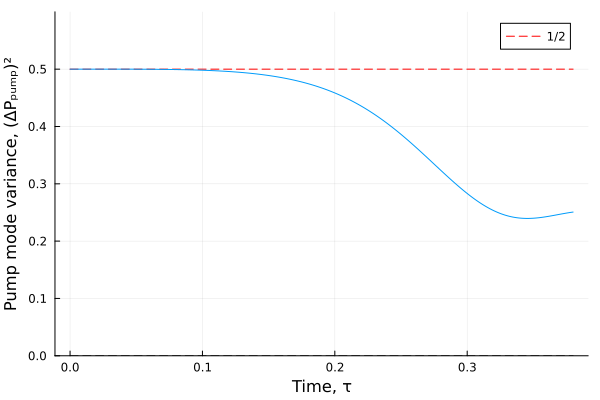

In [5]:
## Eq. C12 in the manuscript:
deltsq_pump_momtm= real.(0.5 .+ sol[oper_a'*oper_a] .- sol[oper_a*oper_a])

plot([0, last(t_arr)], [0.5, 0.5],ls=:dash,color=:red,label="1/2")
plot!(sol.t,deltsq_pump_momtm,label="",xlabel="Time, τ",
                                 ylabel="Pump mode variance, (ΔPₚᵤₘₚ)²",ylims=(0.0,0.6),color=1)
plot!([0, last(t_arr)], [0.0, 0.0],ls=:dash,color=:black,label="")

#### 3. Zero-delay autocorrelation function:

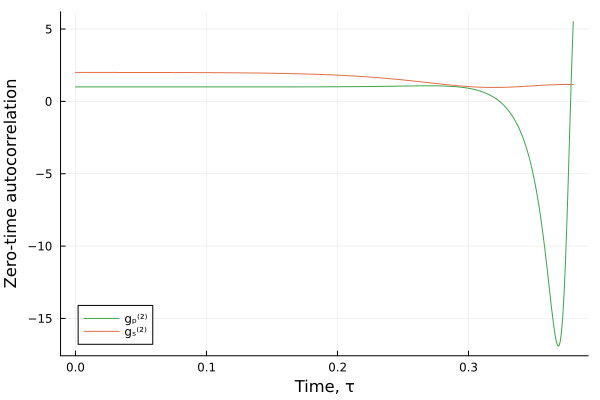

In [6]:
pump_g2= real.((sol[oper_a'*oper_a'*oper_a*oper_a]) ./ (sol[oper_a'*oper_a].^2))
sig_g2= real.((sol[oper_b'*oper_b'*oper_b*oper_b]) ./ (sol[oper_b'*oper_b].^2))
sig_g2[1]=2;

using Plots
plot(sol.t,pump_g2,label="gₚ⁽²⁾",color=3)
plot!(sol.t,sig_g2,label="gₛ⁽²⁾",xlabel="Time, τ", ylabel="Zero-time autocorrelation"
                                                          ,color=2)


#### 4. Exporting all the data (run only if required):

In [8]:
# For writing the data:
#using NPZ
#npzwrite("Cumulant_$(ALP_SQ)_alpha_squared_level4.npy", 
#Dict("time" => sol.t, "pump_population" => real.(sol[oper_a'*oper_a]),
#"signal_population" => real.(sol[oper_b'*oper_b]),"pump_variance_momentum" => deltsq_pump_momtm,
#"pump_g2" => pump_g2, "sig_g2" => sig_g2))